In [3]:
import pandas as pd

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values
df.head()

,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613


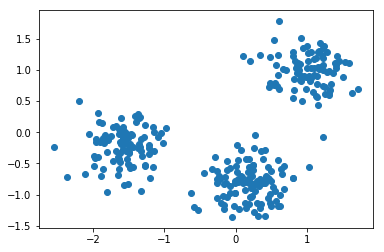

In [6]:
#散点图观察
import matplotlib.pyplot as plt
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)
plt.show()

In [10]:
#聚类操作
df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(points)
labels

array([2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1,
       0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0,
       0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2,
       1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2,
       1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       0])

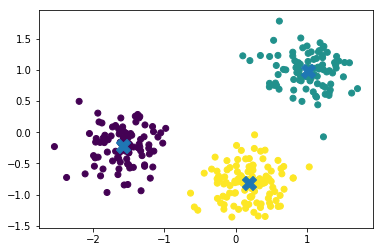

In [11]:
#聚类中心
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(xs, ys, c=labels)
plt.scatter(centroids_x, centroids_y, marker='X', s=200)
plt.show()

#### K值对结果的影响

In [16]:
import pandas as pd

seeds_df = pd.read_csv('./datasets/seeds.csv')

varieties = list(seeds_df['grain_variety'])

del seeds_df['grain_variety']

seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [17]:
samples = seeds_df.values

from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

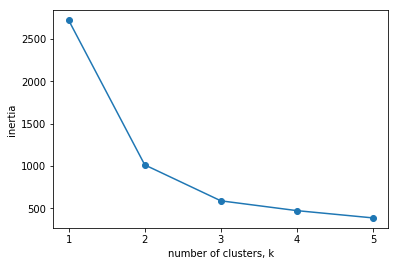

In [18]:
import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

K-means的结果带有一定的随机性

In [32]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [33]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,2,60,10
1,0,1,60
2,68,9,0


#### make_pipeline更方便


In [39]:
import pandas as pd

df = pd.read_csv('./datasets/fish.csv')

species = list(df['species'])

del df['species']

df.head()

,weight,length1,length2,length3,height,width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [40]:
samples = df.values


In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)

pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

labels = pipeline.predict(samples)
df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,1,0,19,1
1,33,0,1,0
2,0,17,0,0
3,0,0,0,13
